<a href="https://colab.research.google.com/github/jmperalta89/portfolio/blob/main/Nube_de_palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Clouds:

Técnica:

La creación de word clouds es una técnica de visualización que muestra las palabras más frecuentes en un conjunto de texto.
No implica análisis de sentimientos; simplemente muestra las palabras más comunes y su frecuencia en el texto.
Las palabras se representan visualmente en un tamaño proporcional a su frecuencia, donde las palabras más frecuentes son más grandes y destacadas en la nube.
Metodología:

La metodología para crear word clouds generalmente involucra los siguientes pasos:
Preprocesamiento de texto: similar al análisis de sentimientos, implica la limpieza y normalización del texto.
Recuento de palabras: se cuentan las ocurrencias de cada palabra en el texto.
Creación de la nube de palabras: las palabras se visualizan en un diseño visual atractivo, donde el tamaño de cada palabra está determinado por su frecuencia.
Ajustes visuales opcionales: se pueden realizar ajustes visuales, como la selección de colores, la eliminación de palabras irrelevantes (stopwords), la personalización de la forma de la nube de palabras, etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords)

NameError: name 'stopwords' is not defined

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/base_encuesta/encuesta_20240125_anonimizado.xlsx"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
encuesta = pd.read_excel(path)

In [ ]:
# Eliminar filas con valores NaN en la columna '¿Por qué no operas con ello
encuesta= encuesta.dropna(subset=['¿Por qué no operas con ellos?'])

In [ ]:
# Select the relevant column with survey responses
reasons_column = '¿Por qué no operas con ellos?'

In [ ]:
# Preprocess the text (optional but recommended):
# - Convert to lowercase
text = encuesta[reasons_column].str.lower()
# - Remove punctuation and special characters
text = text.str.replace('[^\w\s]', '')

<ipython-input-11-c1c1012caa8d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^\w\s]', '')


In [ ]:
# Remove rows with NaN values
text = text.str.replace('Nan', '')

In [ ]:
# - Remove stop words (customized including 'no')
stopwords = set(nltk.corpus.stopwords.words('spanish'))

In [ ]:
# Remove 'no' from stopwords
stopwords.discard('no')


In [ ]:
stopwords.discard('me')

In [ ]:
stopwords.discard('sí')

In [ ]:
print(stopwords)

{'serían', 'quien', 'que', 'erais', 'vuestros', 'tenían', 'estaríais', 'poco', 'están', 'fueron', 'para', 'estad', 'seas', 'estaban', 'hubieses', 'tú', 'hubieran', 'habríamos', 'serías', 'estarías', 'habido', 'fuéramos', 'también', 'teníais', 'estuvieras', 'este', 'nuestras', 'esa', 'otros', 'nos', 'hubiésemos', 'teníamos', 'mías', 'tuve', 'tenidas', 'ti', 'la', 'habidas', 'estabais', 'hay', 'un', 'habíais', 'esto', 'estar', 'tienen', 'sentidas', 'eras', 'tuyas', 'soy', 'hube', 'suya', 'por', 'estaríamos', 'estábamos', 'él', 'tenga', 'ha', 'hasta', 'qué', 'estamos', 'durante', 'seréis', 'vosotras', 'tuvieses', 'tuvo', 'estéis', 'nada', 'tuviéramos', 'las', 'estas', 'estuvierais', 'estén', 'habías', 'sentida', 'ya', 'tened', 'uno', 'tuvimos', 'fue', 'tendrás', 'en', 'tanto', 'sus', 'nuestro', 'muchos', 'era', 'estada', 'estemos', 'está', 'nuestra', 'tuvisteis', 'estaréis', 'desde', 'estaría', 'tuviste', 'tendremos', 'hubimos', 'sentidos', 'había', 'haya', 'tenéis', 'estando', 'se', 'éra

In [ ]:
# Verificar si x es de tipo str antes de dividirlo
text = text.apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))

In [ ]:
# Concatenation:
text = text.str.cat(sep=' ')

In [ ]:
# Display the word cloud
# Create a WordCloud object with customization options
wordcloud = WordCloud(
    width=800, height=600, margin=5, background_color='white',
    max_words=30, max_font_size=2000  # Ajuste de tamaño de fuente máximo
)


In [ ]:
# Generate the word cloud
wordcloud.generate(text)

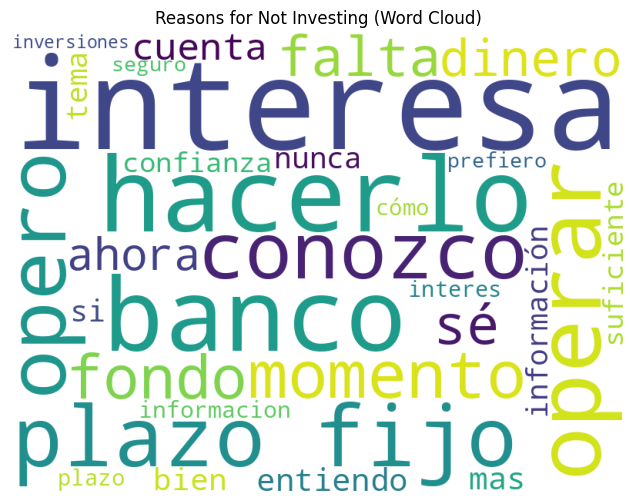

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reasons for Not Investing (Word Cloud)')
plt.show()

#NGRAMS


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import ngrams
from collections import Counter

In [ ]:
# Generar n-grams
n = 3  # Puedes cambiar esto al número de palabras que deseas en tus n-grams
tokens = text.split()
ngram_list = list(ngrams(tokens, n))
ngram_text = [' '.join(gram) for gram in ngram_list]

In [ ]:
# Crear un contador de los n-grams
ngram_counter = Counter(ngram_text)

In [ ]:
top_ngrams = ngram_counter.most_common(30)

In [ ]:
# Display the word cloud
# Create a WordCloud object with customization options
wordcloud = WordCloud(

)

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud( width=800, height=600, margin=5, background_color='white',
    #max_words=40,
    max_font_size=2000  # Ajuste de tamaño de fuente máximo
                       ).generate_from_frequencies(dict(top_ngrams))

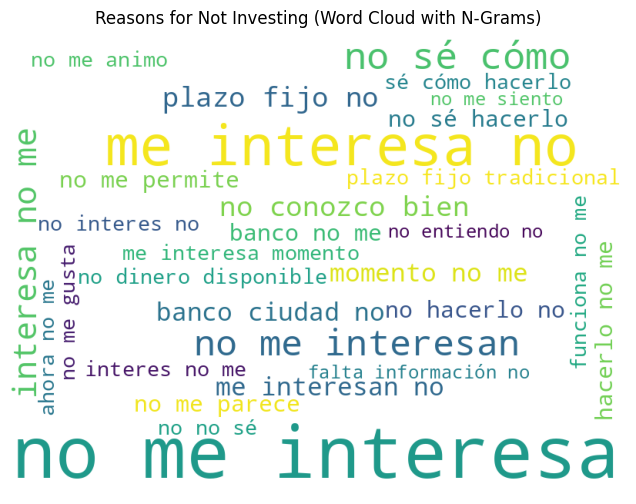

In [ ]:
# Mostrar el word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reasons for Not Investing (Word Cloud with N-Grams)')
plt.show()